# Regressão Logística com expansão de dimensionalidade

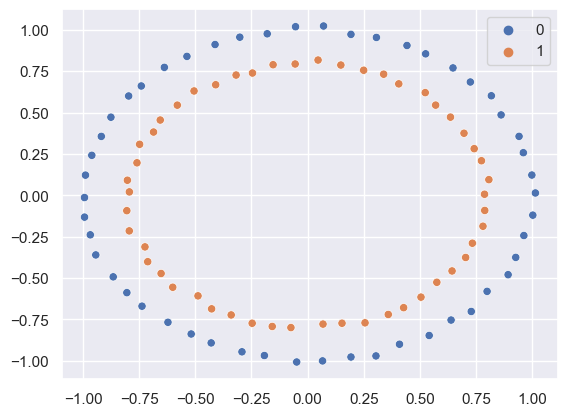

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles
from sklearn.inspection import DecisionBoundaryDisplay

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="darkgrid")

X, y = make_circles(noise=0.01)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

In [11]:
def fronteiras_de_decisão(classificador, _X, _y, título: str) ->  DecisionBoundaryDisplay:
    imagem =  DecisionBoundaryDisplay.from_estimator(classificador,
                                                    _X,
                                                    xlabel='X1',
                                                    ylabel='X2',
                                                    grid_resolution=1000,
                                                    response_method='predict')

    imagem.ax_.scatter(_X[:, 0], _X[:, 1], c=_y, edgecolors='k')
    imagem.ax_.set_title(título)

    return imagem

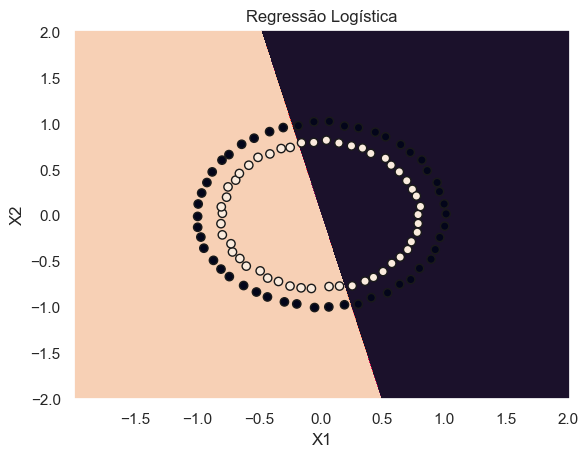

In [12]:
ajuste = LogisticRegression().fit(X, y)

fronteiras_de_decisão(ajuste, X, y, 'Regressão Logística');

In [13]:
def polinomio_quadrático(X):
    return np.c_[X[:, 0] ** 2, X[:, 1] ** 2, np.sqrt(2) * X[:, 0] * X[:, 1]]

X_transformado = polinomio_quadrático(X)

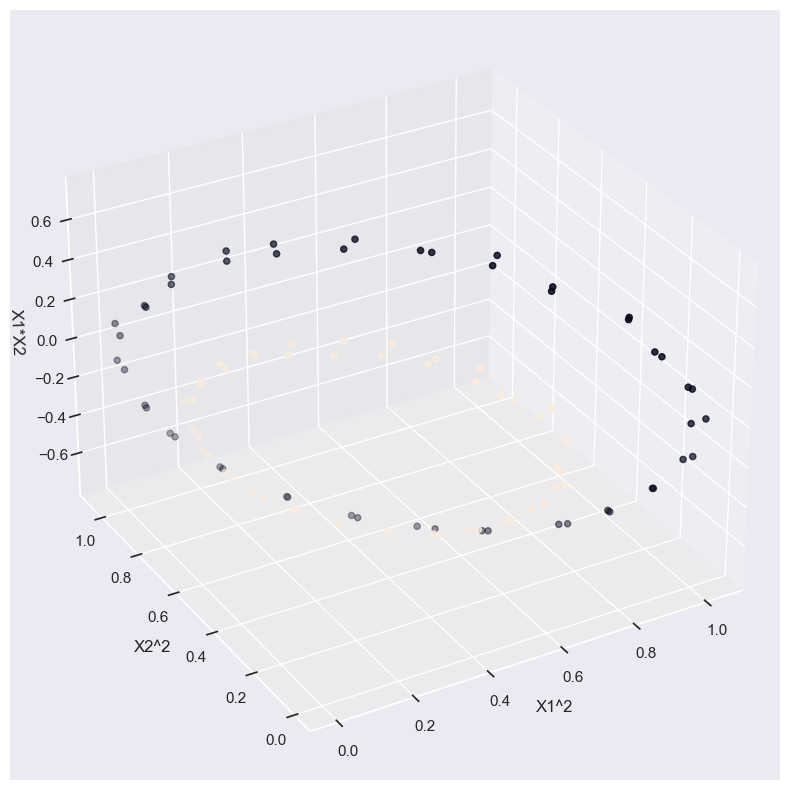

In [14]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(xs=X_transformado[:, 0], ys=X_transformado[:, 1], zs=X_transformado[:, 2], c=y)

ax.set_xlabel('X1^2')
ax.set_ylabel('X2^2')
ax.set_zlabel('X1*X2')

ax.view_init(30, -120)
ax.figure.set_size_inches(16, 10)

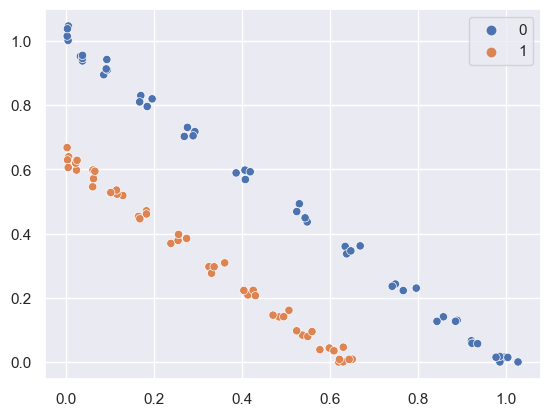

In [15]:
sns.scatterplot(x=X_transformado[:, 0], y=X_transformado[:, 1], hue=y);

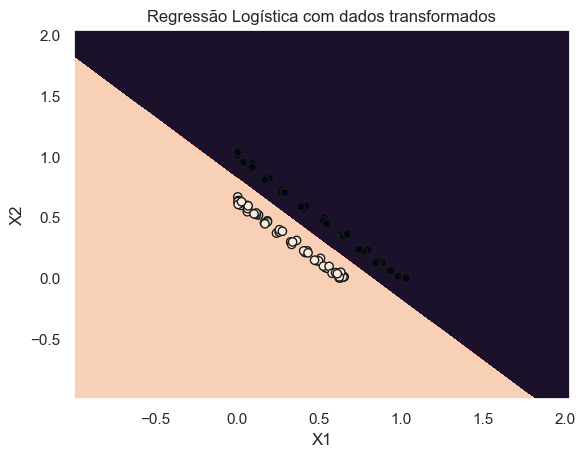

In [16]:
ajuste_transformado_quadrados = LogisticRegression().fit(X_transformado[:, [0,1]], y)
fronteiras_de_decisão(ajuste_transformado_quadrados, X_transformado[:, [0,1]], y, 'Regressão Logística com dados transformados');

In [17]:
ajuste_transformado = LogisticRegression().fit(X_transformado, y)

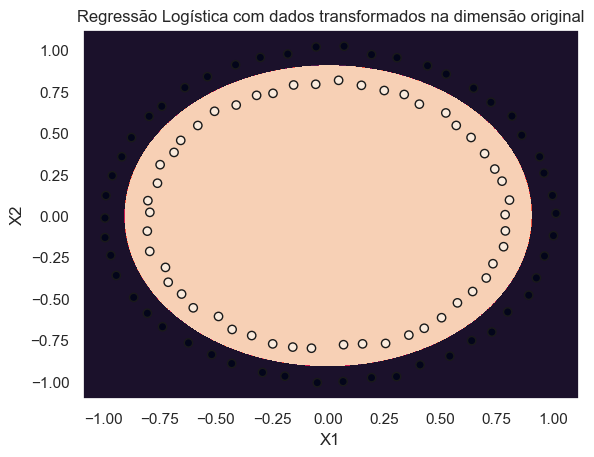

In [18]:
x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 1000),
np.linspace(y_min, y_max, 1000))

x_in = np.c_[xx.ravel(), yy.ravel()]
x_in.shape
y_pred = ajuste_transformado.predict(polinomio_quadrático(x_in))

y_pred = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, y_pred)
plt.title('Regressão Logística com dados transformados na dimensão original')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[:,0], X[:, 1], c=y, edgecolors='k');
